In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import nltk
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer

from sklearn.preprocessing import LabelEncoder

from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE
from gensim.models import Word2Vec

from datetime import datetime

#import contractions
#import langdetect
#from langdetect import detect
#import emot
#from emot.emo_unicode import EMOTICONS_EMO, UNICODE_EMOJI

import re
import pickle
import string
import os

#os.chdir('/Users/michelleyuu/Desktop/data270/data')

In [40]:
data9 = pd.read_csv('training.1600000.processed.noemoticon.csv',encoding = "ISO-8859-1", engine="python" ,
                    header= None,
                    names = ['sentiment', 'id', 'date', 'flag', 'user', 'text'])
data9 = data9.drop(columns='flag')
data10 = data9
data9

,sentiment,id,date,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [87]:
data = data9.head(50000)

In [88]:
data

,sentiment,id,date,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...
49995,0,1678337109,Sat May 02 06:22:31 PDT 2009,Jessica_567,@mileycyrus so i have the same insomnia prob a...
49996,0,1678337116,Sat May 02 06:22:31 PDT 2009,whouwit077,20 mintues late for my meeting starting @ 8 h...
49997,0,1678337128,Sat May 02 06:22:31 PDT 2009,AmyPR,@kentucky_derby super excited! Are you tweetin...
49998,0,1678337159,Sat May 02 06:22:32 PDT 2009,cynthia_sue03,I WANT ANOTHER DAY OFF!!!! To much Sh#t to do...


In [6]:
#data9['sentiment'] = data9['sentiment'].apply(lambda x: x/4).astype(int)

In [7]:
data9.dtypes

sentiment     int64
id            int64
date         object
user         object
text         object
dtype: object

In [8]:
#https://github.com/NeelShah18/emot/blob/master/emot/emo_unicode.py

In [39]:
harassment = pd.read_csv("Harassment Lexicon.csv")
harassment

,Sexual,Racial,Appearance,Intelligence,Politics,Generic
0,amateur,abbo,alla,cockbite,anal,assbite
1,AnalAnnie,abo,big ass,Cockmuncher,anus,asscock
2,Angie,African Forklift,camel toe,demon,arse,asses
3,Aroused,Alligator Bait,Chesticles,demonrats,asian,assface
4,assblaster,arab,cock waffle,dickwad,ass-hat,asshat
...,...,...,...,...,...,...
447,wankjob,NaN,NaN,NaN,NaN,NaN
448,wetspot,NaN,NaN,NaN,NaN,NaN
449,whore,NaN,NaN,NaN,NaN,NaN
450,whorefucker,NaN,NaN,NaN,NaN,NaN


In [10]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
#stop_words = set(stopwords.words('English'))
stop_words = nltk.corpus.stopwords.words('English') + ["can't", "shoulda", "to", "of", "it"]

#word_tokens = word_tokenize(data10['text'])

#data_no_sw = [w for w in data10['text'] if not w.lower() in stop_words]

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/maggie/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/maggie/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/maggie/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [11]:
#stop_words

In [12]:
def convert_emoticons(text):
    for emot in UNICODE_EMOJI:
        text = re.sub(u'('+emot+')', "_".join(UNICODE_EMOJI[emot].replace(",","").split() ), text)
    return text

def remove_punctuation(text):
    """
    Remove the string patterns with Regex
    """
    punctuation_pattern = re.compile(r'[^A-Za-z0-9\s]')
    return punctuation_pattern.sub(r'', text)

def remove_urls(text):
    """
    Remove the URL patterns with Regex

    Reference:
    https://stackoverflow.com/questions/11331982/how-to-remove-any-url-within-a-string-in-python
    
    """
    #url_pattern = re.compile(r'(https?://)*(www\.)*?\S+\.*com*\S*')
    url_pattern = re.compile(r'[a-z]*[:.]+\S+')
    return url_pattern.sub(r'', text)

def remove_userat_hashtags(text):
    """
    Remove the Hashtags (pound) and the at symbol with Regex
    """
    userat_hashtag_pattern = re.compile(r'([\@\#]+[A-Z,a-z0-9\_\-\:\.\~]+)')
    return userat_hashtag_pattern.sub(r'',text)

lemmatizer = nltk.stem.WordNetLemmatizer()
stemmer = SnowballStemmer("english")

def apply_regex(dataframe):
    """
    Removing Hashtags, URLs before removing punctuation due to the complexity from removing punctuation early.
    Possibility to remove emoticons, need to figure out how to reduce run time with custom function.
    Should lower case be done at the beginning? Proper Nouns are in the dataset
    """
    #lowers text
    dataframe['text_lower'] = dataframe['text'].str.lower()

    #remove stopwords and create a new column
    dataframe['text_no_stop'] = dataframe['text_lower'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words ]))
    #https://stackoverflow.com/questions/29523254/python-remove-stop-words-from-pandas-dataframe

    #convert Emoticons to text
    #dataframe['text'] = dataframe['text'].apply(lambda x: convert_emoticons(x))
    
    #remove URLs
    dataframe['text_no_stop'] = dataframe['text_no_stop'].apply(lambda x: remove_urls(x))
    
    #remove Hashtags/URLs
    dataframe['text_no_stop'] = dataframe['text_no_stop'].apply(lambda x: remove_userat_hashtags(x))
    
    #remove punctuation
    dataframe['text_no_stop'] = dataframe['text_no_stop'].apply(lambda x: remove_punctuation(x))

    #Tokenize the dataframe
    dataframe['tokenized_words'] = dataframe.apply(lambda x: ' '.join([lemmatizer.lemmatize(x, wordnet.VERB) for x in nltk.word_tokenize(x['text_no_stop'])]), axis=1)
    #https://stackoverflow.com/questions/33098040/how-to-use-word-tokenize-in-data-frame
    #https://stackoverflow.com/questions/15586721/wordnet-lemmatization-and-pos-tagging-in-python

    return dataframe

In [13]:
def classification_func(dataframe):

    sexual = list(harassment['Sexual'].dropna().str.lower())
    racial = list(harassment['Racial'].dropna().str.lower())
    appearance = list(harassment['Appearance'].dropna().str.lower())
    intelligence = list(harassment['Intelligence'].dropna().str.lower())
    politics = list(harassment['Politics'].dropna().str.lower())
    generic = list(harassment['Generic'].dropna().str.lower())
    harassment_list = sexual + racial + appearance + intelligence + politics + generic

    dataframe['sexual'] = dataframe['tokenized_words'].apply(lambda x: any(i in x for i in sexual)).astype(int)
    dataframe['racial'] = dataframe['tokenized_words'].apply(lambda x: any(i in x for i in racial)).astype(int)
    dataframe['appearance'] = dataframe['tokenized_words'].apply(lambda x: any(i in x for i in appearance)).astype(int)
    dataframe['intelligence'] = dataframe['tokenized_words'].apply(lambda x: any(i in x for i in intelligence)).astype(int)
    dataframe['politics'] = dataframe['tokenized_words'].apply(lambda x: any(i in x for i in politics)).astype(int)
    dataframe['generic'] = dataframe['tokenized_words'].apply(lambda x: any(i in x for i in generic)).astype(int)

    #data_har = data_sample['tokenized_words'].apply(lambda x: any(i in x for i in harassment_list))
    
    return dataframe

def label_func(dataframe):
    condition =  [
    dataframe['sexual'] == 1,
    dataframe['racial'] == 1,
    dataframe['appearance'] == 1,
    dataframe['intelligence'] == 1,
    dataframe['politics'] == 1,
    dataframe['generic'] == 1,
    (dataframe['sexual'] == 0) & (dataframe['racial'] == 0) & (dataframe['appearance'] == 0) 
    & (dataframe['intelligence'] == 0) & (dataframe['politics'] == 0) & (dataframe['generic'] == 0)
    ]

    label = ["sexual", "racial", "appearance", "intelligence", "politics", "generic", "Noncyberbullying"]

    dataframe['label'] = np.select(condition, label)

    return dataframe

def encoding_func(dataframe):
    label = ["sexual", "racial", "appearance", "intelligence", "politics", "generic", "Noncyberbullying"]

    encoder = LabelEncoder()
    encoder.fit(label)

    dataframe['encoded_label'] = encoder.transform(dataframe['label'])

    return dataframe

In [14]:
data_test = apply_regex(data10)

In [15]:
data_test = classification_func(data_test)

In [16]:
data_test = label_func(data_test)
data_test = encoding_func(data_test)

In [17]:
data_test

,sentiment,id,date,user,text,text_lower,text_no_stop,tokenized_words,sexual,racial,appearance,intelligence,politics,generic,label,encoded_label
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...","@switchfoot http://twitpic.com/2y1zl - awww, t...",awww thats bummer got david carr third day ...,awww thats bummer get david carr third day it d,0,0,0,0,0,0,Noncyberbullying,0
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,scotthamilton,is upset that he can't update his Facebook by ...,is upset that he can't update his facebook by ...,upset update facebook texting might cry resul...,upset update facebook texting might cry result...,0,0,0,0,0,0,Noncyberbullying,0
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,mattycus,@Kenichan I dived many times for the ball. Man...,@kenichan i dived many times for the ball. man...,dived many times ball managed save 50 rest go...,dive many time ball manage save 50 rest go bound,0,0,0,0,0,0,Noncyberbullying,0
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,ElleCTF,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire,whole body feels itchy like fire,whole body feel itchy like fire,0,0,0,0,0,0,Noncyberbullying,0
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,Karoli,"@nationwideclass no, it's not behaving at all....","@nationwideclass no, it's not behaving at all....",no behaving all im mad here see there,no behave all im mad here see there,0,0,0,0,0,0,Noncyberbullying,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,AmandaMarie1028,Just woke up. Having no school is the best fee...,just woke up. having no school is the best fee...,woke up school best feeling ever,wake up school best feel ever,0,0,0,0,0,0,Noncyberbullying,0
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...,thewdb.com - very cool to hear old walt interv...,cool hear old walt interviews,cool hear old walt interview,0,0,0,0,0,0,Noncyberbullying,0
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,bpbabe,Are you ready for your MoJo Makeover? Ask me f...,are you ready for your mojo makeover? ask me f...,ready mojo makeover ask details,ready mojo makeover ask detail,0,0,0,0,0,0,Noncyberbullying,0
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...,happy 38th birthday to my boo of alll time!!! ...,happy 38th birthday boo alll time tupac amaru ...,happy 38th birthday boo alll time tupac amaru ...,0,0,0,0,0,0,Noncyberbullying,0


In [97]:
data = data_test.head(50000)
data

,sentiment,id,date,user,text,text_lower,text_no_stop,tokenized_words,sexual,racial,appearance,intelligence,politics,generic,label,encoded_label
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...","@switchfoot http://twitpic.com/2y1zl - awww, t...",awww thats bummer got david carr third day ...,awww thats bummer get david carr third day it d,0,0,0,0,0,0,Noncyberbullying,0
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,scotthamilton,is upset that he can't update his Facebook by ...,is upset that he can't update his facebook by ...,upset update facebook texting might cry resul...,upset update facebook texting might cry result...,0,0,0,0,0,0,Noncyberbullying,0
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,mattycus,@Kenichan I dived many times for the ball. Man...,@kenichan i dived many times for the ball. man...,dived many times ball managed save 50 rest go...,dive many time ball manage save 50 rest go bound,0,0,0,0,0,0,Noncyberbullying,0
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,ElleCTF,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire,whole body feels itchy like fire,whole body feel itchy like fire,0,0,0,0,0,0,Noncyberbullying,0
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,Karoli,"@nationwideclass no, it's not behaving at all....","@nationwideclass no, it's not behaving at all....",no behaving all im mad here see there,no behave all im mad here see there,0,0,0,0,0,0,Noncyberbullying,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0,1678337109,Sat May 02 06:22:31 PDT 2009,Jessica_567,@mileycyrus so i have the same insomnia prob a...,@mileycyrus so i have the same insomnia prob a...,insomnia prob slept 3 hrs woke 5am nd couldnt...,insomnia prob sleep 3 hrs wake 5am nd couldnt ...,0,0,0,0,0,0,Noncyberbullying,0
49996,0,1678337116,Sat May 02 06:22:31 PDT 2009,whouwit077,20 mintues late for my meeting starting @ 8 h...,20 mintues late for my meeting starting @ 8 h...,20 mintues late meeting starting 8 howd know ...,20 mintues late meet start 8 howd know go 2 la...,0,0,0,0,0,0,Noncyberbullying,0
49997,0,1678337128,Sat May 02 06:22:31 PDT 2009,AmyPR,@kentucky_derby super excited! Are you tweetin...,@kentucky_derby super excited! are you tweetin...,super excited tweeting event happenings way f...,super excite tweet event happen way follow year,0,0,0,0,0,0,Noncyberbullying,0
49998,0,1678337159,Sat May 02 06:22:32 PDT 2009,cynthia_sue03,I WANT ANOTHER DAY OFF!!!! To much Sh#t to do...,i want another day off!!!! to much sh#t to do...,want another day off much sh today got quotnew...,want another day off much sh today get quotnew...,1,0,0,0,0,0,sexual,6


In [46]:
data_test["sexual"].value_counts()

0    1455072
1     144928
Name: sexual, dtype: int64

In [170]:
data_sample =  data_test[data_test['text'].str.contains('whore')].reset_index(drop=True)
data_set1 = data_sample[['id', 'sentiment', 'tokenized_words','label', 'encoded_label']]
data_set1

,id,sentiment,tokenized_words,label,encoded_label
0,1468253551,0,whats wrong attention whore,sexual,6
1,1468863900,0,ohhh stupid whore argh well ok love,sexual,6
2,1548882148,0,miss u tear whore,sexual,6
3,1548883077,0,miss u tear whore come back home,sexual,6
4,1551117252,0,kind manwhore last night,sexual,6
...,...,...,...,...,...
501,2191864825,4,firefox take 500mb ram lol im browser browsers...,Noncyberbullying,0
502,2191944643,4,earbuds now listen make happy,Noncyberbullying,0
503,2192355201,4,tyra look good svelt happpy sich fat whore any...,sexual,6
504,2192673288,4,megans whore,sexual,6


In [174]:
data_set1.to_csv('data_set1.csv')

In [175]:
pwd

'/Users/maggie/Desktop/GWAR - Data Analyt Process/Project'

In [ ]:
data_set1.replace(to_replace=None, value=None, inplace=False, limit=None, regex=False, method='pad')

In [172]:
data_set1.loc[data_set1['encoded_label'] == '5', 'encoded_label'] = '0'

/Users/maggie/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [168]:
data_set1['encoded_label']= data_set1['encoded_label'].replace(['5'],'0',inplace=True)

/Users/maggie/opt/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/var/folders/1v/x5wmbpv968z1bmkh4vxwvqt80000gn/T/ipykernel_1307/2365761098.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_set1['encoded_label']= data_set1['encoded_label'].replace(['5'],'0',inplace=True)


In [173]:
data_set1['encoded_label'].value_counts()

6    408
0     92
5      4
2      1
4      1
Name: encoded_label, dtype: int64

In [95]:
data["text"][4]

"@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there. "

In [98]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(0, len(data)):
    review = re.sub('[^a-zA-Z]', ' ', data["text"][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [99]:
corpus

['switchfoot http twitpic com zl awww bummer shoulda got david carr third day',
 'upset updat facebook text might cri result school today also blah',
 'kenichan dive mani time ball manag save rest go bound',
 'whole bodi feel itchi like fire',
 'nationwideclass behav mad see',
 'kwesidei whole crew',
 'need hug',
 'loltrish hey long time see ye rain bit bit lol fine thank',
 'tatiana k nope',
 'twittera que muera',
 'spring break plain citi snow',
 'pierc ear',
 'caregiv bear watch thought ua loss embarrass',
 'octolinz count idk either never talk anymor',
 'smarrison would first gun realli though zac snyder doucheclown',
 'iamjazzyfizzl wish got watch miss iamlilnicki premier',
 'holli death scene hurt sever watch film wri director cut',
 'file tax',
 'lettya ahh ive alway want see rent love soundtrack',
 'fakerpattypattz oh dear drink forgotten tabl drink',
 'alydesign day get much done',
 'one friend call ask meet mid valley today time sigh',
 'angri barista bake cake ate',
 'week g

In [104]:
## Applying Countvectorizer
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()

In [105]:
X.shape

(50000, 525567)

In [106]:
cv = CountVectorizer(max_features=3000,ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()

In [107]:
X.shape

(50000, 3000)

In [108]:
y=data['encoded_label']
y

0        0
1        0
2        0
3        0
4        0
        ..
49995    0
49996    0
49997    0
49998    6
49999    0
Name: encoded_label, Length: 50000, dtype: int64

In [109]:
## Divide the dataset into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [110]:
cv.get_feature_names()[:20]

['abl',
 'abl get',
 'abl go',
 'absolut',
 'abt',
 'ac',
 'accept',
 'access',
 'accid',
 'accident',
 'account',
 'ace',
 'ace prize',
 'ace prize win',
 'ach',
 'across',
 'act',
 'action',
 'activ',
 'actual']

In [111]:
count_df = pd.DataFrame(X_train, columns=cv.get_feature_names())

In [112]:
count_df.head()

,abl,abl get,abl go,absolut,abt,ac,accept,access,accid,accident,...,yr,yr old,yuck,yucki,yum,yummi,yup,zero,zombi,zone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [116]:

#We use Support Vector classifier as a classifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

In [117]:
#training the classifier using X_Train and y_train 
clf = SVC(kernel = 'linear').fit(X_train,y_train)
clf.predict(X_train)

array([5, 0, 0, ..., 0, 0, 0])

In [118]:
#Testing the model using X_test and storing the output in y_pred
y_pred = clf.predict(X_test)

In [121]:
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(cm,
                     index = ['0','1','2','3','4','5','6'], 
                     columns = ['0','1','2','3','4','5','6'])

Exception ignored in: <function SeekableUnicodeStreamReader.__del__ at 0x7f94dac8fa60>
Traceback (most recent call last):
  File "/Users/maggie/opt/anaconda3/lib/python3.9/site-packages/nltk/data.py", line 1160, in __del__
    if not self.closed:
  File "/Users/maggie/opt/anaconda3/lib/python3.9/site-packages/nltk/data.py", line 1180, in closed
    return self.stream.closed
AttributeError: 'SeekableUnicodeStreamReader' object has no attribute 'stream'


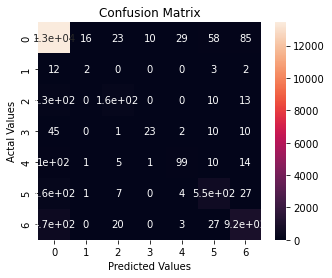

In [122]:
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
#Data Reduction

In [113]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()

In [115]:
from sklearn import metrics
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

accuracy:   0.921


NameError: name 'plot_confusion_matrix' is not defined

In [38]:
data_set1["encoded_label"].value_counts()

6    408
0     92
5      4
2      1
4      1
Name: encoded_label, dtype: int64

In [47]:
data_set1["label"].value_counts()

sexual              408
Noncyberbullying     92
racial                4
generic               1
politics              1
Name: label, dtype: int64

In [ ]:
data_clean = data_clean[['sentiment', 'id', 'date', 'user', 'tokenized_words', 'encoded_label', 'label']]

In [ ]:
data_clean = data_clean[['sentiment', 'id', 'date', 'user', 'tokenized_words', 'encoded_label', 'label']]

In [27]:
#Regularization

vectorizer = TfidfVectorizer(norm='l2', binary=True)
reg_vec = vectorizer.fit_transform(data_set1['tokenized_words'])

#data reduction
tsvd = TruncatedSVD(n_components=10, n_iter=10, random_state = 42)
#pca = PCA(n_components=10, svd_solver='randomized', random_state = 42)

tsvd.fit(reg_vec)
tsvd_mat = tsvd.transform(reg_vec)

#pca.fit(reg_vec)
#pca_mat = pca.transform(reg_vec)

#Word2Vec?


In [28]:
reg_vec.shape

(506, 1595)

In [29]:
vectorizer.get_feature_names()

['10',
 '100',
 '10000',
 '12',
 '15',
 '18',
 '20',
 '200',
 '24hrs',
 '25',
 '27th',
 '2am',
 '2day',
 '2nitefoster',
 '300',
 '40',
 '400',
 '418',
 '45',
 '50',
 '500mb',
 '500th',
 '50k',
 '50s',
 '5million',
 '640am',
 '900',
 'a2',
 'aahah',
 'about',
 'accident',
 'achieve',
 'achievement',
 'act',
 'actor',
 'actually',
 'ad',
 'add',
 'addict',
 'adopt',
 'adrianna',
 'adrinna',
 'advice',
 'aerosmith',
 'aftermoving',
 'afternoon',
 'again',
 'ago',
 'agree',
 'ah',
 'ahaha',
 'ahhh',
 'ahhhh',
 'ahhhhh',
 'aidan',
 'aim',
 'aint',
 'aka',
 'ako',
 'album',
 'alcohol',
 'alex',
 'all',
 'allege',
 'almost',
 'alone',
 'already',
 'also',
 'although',
 'alvin',
 'always',
 'amarthgoatwhore',
 'amaze',
 'ambulance',
 'american',
 'amon',
 'amp',
 'and',
 'andy',
 'ang',
 'angel',
 'annie',
 'annoy',
 'anonymous',
 'another',
 'answer',
 'antic',
 'antony',
 'anymore',
 'anything',
 'anyway',
 'anywhoreee',
 'app',
 'apparently',
 'applaud',
 'applebees',
 'apply',
 'apprentice

In [49]:
word_vec = Word2Vec(data_set1['tokenized_words'], min_count = 1, vector_size = 50, sg = 1, window = 3, workers=4)

In [50]:
word_vec

In [32]:
plt.figure(figsize=(10,8))
sns.scatterplot(tsne_mat[:,0],tsne_mat[:,1],hue=data_set1['label'])

NameError: name 'tsne_mat' is not defined

<Figure size 720x576 with 0 Axes>

In [26]:
dtm_mat

NameError: name 'dtm_mat' is not defined

In [ ]:
xx

In [33]:
#data_sample['text_lower'].apply(lambda x: any(i in x for i in sexual))
#corpus_list = data_sample['tokenized_words'].tolist()

#data_neg = data_test[data_test['sentiment'] == 0]
#data_sample =  data_neg[data_neg['text'].str.contains('whore')].reset_index(drop=True)

#data_test['text_snowball'] = data_test['text_no_stop'].apply(apply_stem)
#data_test['text_lem'] = data_test['text_no_stop'].apply(lemmatize_text)

#def apply_stem(text):
#    text = [stemmer.stem(word) for word in text.split()]
#    return ' '.join(text)

#wordnet_tokenizer = nltk.tokenize.WhitespaceTokenizer()

#def lemmatize_text(text):
#    text = [lemmatizer.lemmatize(word) for word in text.split()]
#    return ' '.join(text)

pca = PCA(n_components=5, svd_solver='randomized')
vectorizer = CountVectorizer(min_df=1)

dtm = CountVectorizer(max_df=0.7, min_df=5, token_pattern="[a-z']+", stop_words=stop_words, max_features=2000)

#https://www.analyticsvidhya.com/blog/2021/09/latent-semantic-analysis-and-its-uses-in-natural-language-processing/

dtm.fit(data_set1['tokenized_words'])
dtm_mat = dtm.transform(data_set1['tokenized_words'])

tsvd = TruncatedSVD(n_components=10, n_iter=10, random_state=42)
tsvd.fit(dtm_mat)
tsvd_mat = tsvd.transform(dtm_mat)


In [34]:
def display_closestwords_tsnescatterplot(model, word, size):
    
    arr = np.empty((0,size), dtype='f')
    word_labels = [word]

    close_words = model.similar_by_word(word)

    arr = np.append(arr, np.array([model[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)

    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    plt.scatter(x_coords, y_coords)

    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
        plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
        plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
        plt.show()

Markdown